# Dataset Cleaning and Wrangling

Original Dataset Available at
https://www.kaggle.com/datasets/rishidamarla/espn-cricket-players

Deliverable 1

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [2]:
input_file = 'SuperCleaned.csv'
output_file = 'Cleaned-Cricket-Dataset.csv'

# Load the CSV file into a pandas DataFrame.
df = pd.read_csv(input_file)

# Select the columns containing batting and bowling data.
batting_columns = df.columns[14:]

# Convert the selected columns to numeric type, replacing non-numeric values with NaN.
df[batting_columns] = df[batting_columns].apply(pd.to_numeric, errors='coerce')

# Create a condition to filter rows where either batting or bowling data is available.
condition = (df[batting_columns] > 0).any(axis=1)

# Filter the DataFrame based on the condition.
filtered_df = df[condition]

filtered_df.drop('Date_of_death', axis=1, inplace=True)

filtered_df.dropna(subset=['Birthdate', 'Birthplace'], how='any', inplace=True)

# Calculate the threshold for retaining columns (99% of non-null values).
threshold = 0.85 * len(filtered_df)

# Drop columns with more than the threshold number of missing values.
filtered_df.dropna(axis=1, thresh=threshold, inplace=True)

filtered_df.dropna(how='any', inplace=True)

filtered_df.drop(df.filter(regex="Unname"),axis=1, inplace=True)

filtered_df['ID'] = range(1, len(filtered_df) + 1)

# Save the filtered DataFrame to a new CSV file.
#filtered_df.to_csv(output_file, index=False)


/var/folders/c_/gw4l04g56j1f7l0h5k_xrw7h0000gn/T/ipykernel_5202/1109932499.py:5: DtypeWarning: Columns (101,107,108,140,141,145,146,147,153,154,158,159,160) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(input_file)
/var/folders/c_/gw4l04g56j1f7l0h5k_xrw7h0000gn/T/ipykernel_5202/1109932499.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop('Date_of_death', axis=1, inplace=True)
/var/folders/c_/gw4l04g56j1f7l0h5k_xrw7h0000gn/T/ipykernel_5202/1109932499.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.dropna(subset=['Birthdate', 'Birthplace'

In [3]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

numeric_columns = filtered_df.select_dtypes(include=['number']).columns

# Apply Min-Max scaling to the selected columns
filtered_df[numeric_columns] = scaler.fit_transform(filtered_df[numeric_columns])


/var/folders/c_/gw4l04g56j1f7l0h5k_xrw7h0000gn/T/ipykernel_5202/3133077298.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[numeric_columns] = scaler.fit_transform(filtered_df[numeric_columns])


In [4]:
#filtered_df['ID'] = range(1, len(filtered_df) + 1)

In [5]:
# Assuming df is your DataFrame
columns_to_drop = ['Birthdate', 'Birthplace', 'Died', 'Age','ID','BATTING_First-class_Ct', 'BATTING_First-class_St', 'BOWLING_First-class_Mat']

filtered_df.drop(columns=columns_to_drop, inplace=True)

/var/folders/c_/gw4l04g56j1f7l0h5k_xrw7h0000gn/T/ipykernel_5202/2436461144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(columns=columns_to_drop, inplace=True)


In [6]:
filtered_df.rename(columns={'BATTING_First-class_Mat': 'Matches'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_Inns': 'Innings'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_NO': 'In-At Number'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_Runs': 'Runs'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_Ave': 'Average'}, inplace=True)
filtered_df.rename(columns={'BATTING_First-class_100': 'Centuries'}, inplace=True)

/var/folders/c_/gw4l04g56j1f7l0h5k_xrw7h0000gn/T/ipykernel_5202/1334145108.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'BATTING_First-class_Mat': 'Matches'}, inplace=True)
/var/folders/c_/gw4l04g56j1f7l0h5k_xrw7h0000gn/T/ipykernel_5202/1334145108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.rename(columns={'BATTING_First-class_Inns': 'Innings'}, inplace=True)
/var/folders/c_/gw4l04g56j1f7l0h5k_xrw7h0000gn/T/ipykernel_5202/1334145108.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation

In [7]:
# Create a list of countries to keep
countries_to_keep = ['England', 'India', 'Pakistan', 'Australia', 'New Zealand', 'South Africa', 'Sri Lanka', 'West Indies']

# Filter the DataFrame
filtered_df.drop(filtered_df[~filtered_df['COUNTRY'].isin(countries_to_keep)].index, inplace=True)

/var/folders/c_/gw4l04g56j1f7l0h5k_xrw7h0000gn/T/ipykernel_5202/3994125500.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.drop(filtered_df[~filtered_df['COUNTRY'].isin(countries_to_keep)].index, inplace=True)


In [8]:
player_with_unusual_style = filtered_df[filtered_df['Batting style'] == 'Right-hand bat, Right-hand bat']
player_name = player_with_unusual_style['NAME'].values[0]

print("Player with unusual style:", player_name)

Player with unusual style: Kalum Fernando


In [9]:
# Identify the row with the unusual batting style
index_to_remove = filtered_df[filtered_df['Batting style'] == 'Right-hand bat, Right-hand bat'].index[0]

# Remove the row from the DataFrame
filtered_df = filtered_df.drop(index_to_remove)

# Reset the index of the DataFrame
filtered_df.reset_index(drop=True, inplace=True)

In [10]:
filtered_df.to_csv(output_file, index=False)

# Exploratory Data Analysis

Deliverable 2

In [11]:
df = pd.read_csv('Cleaned-Cricket-Dataset.csv')

In [12]:
batting_style = df['Batting style']
batting_style_counts = batting_style.value_counts()
batting_style_counts

Batting style
Right-hand bat    23101
Left-hand bat      4832
Name: count, dtype: int64

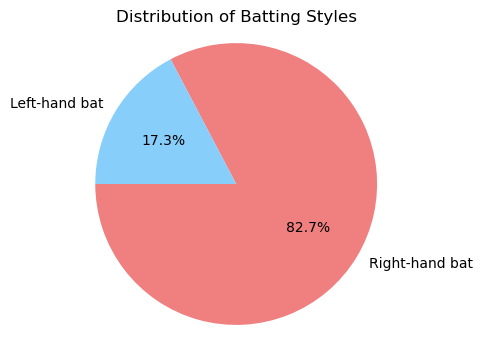

In [13]:
# Create a pie chart
plt.figure(figsize=(4, 4))  # Adjust the figure size as needed

# Define colors for the pie chart (optional)
colors = ['lightcoral', 'lightskyblue']

# Create the pie chart
plt.pie(batting_style_counts, labels=batting_style_counts.index, autopct='%1.1f%%', colors=colors, startangle=180)

# Add a title
plt.title('Distribution of Batting Styles')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

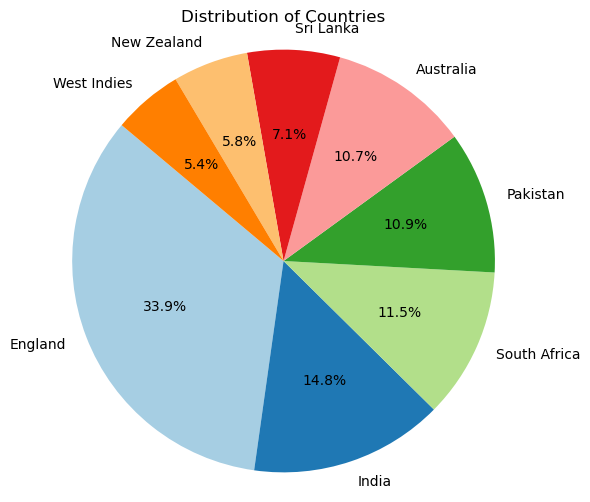

In [14]:
# Extract the "COUNTRY" column
countries = df['COUNTRY']

# Calculate the frequency of each country
country_counts = countries.value_counts()

# Create a pie chart for the country distribution
plt.figure(figsize=(6, 6))  # Adjust the figure size as needed

# You can choose a colormap for the pie chart; here, we'll use a random one.
colors = plt.cm.Paired(range(len(country_counts)))

# Create the pie chart
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', colors=colors, startangle=140)

# Add a title
plt.title('Distribution of Countries')

# Display the pie chart
plt.axis('equal')  # Equal aspect ratio ensures that the pie is drawn as a circle.
plt.show()

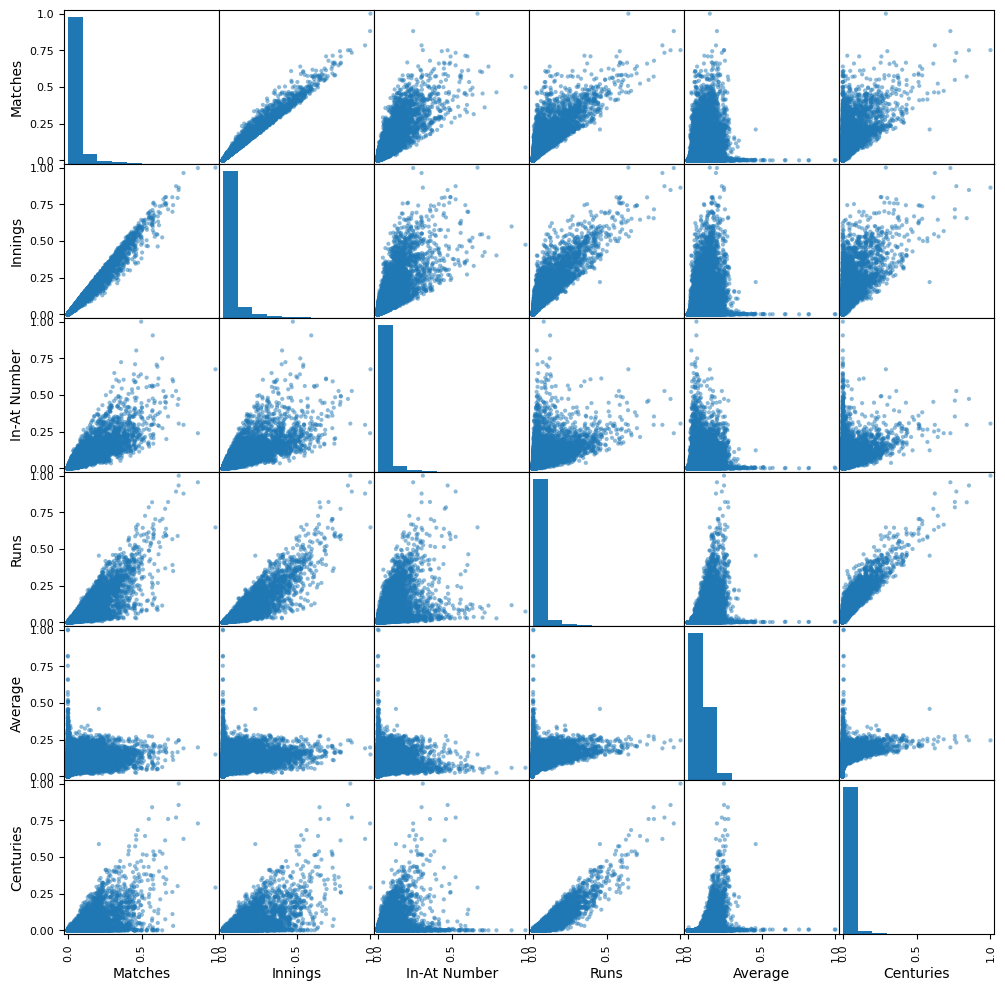

In [15]:
pd.plotting.scatter_matrix(df,figsize=(12, 12))
plt.show()

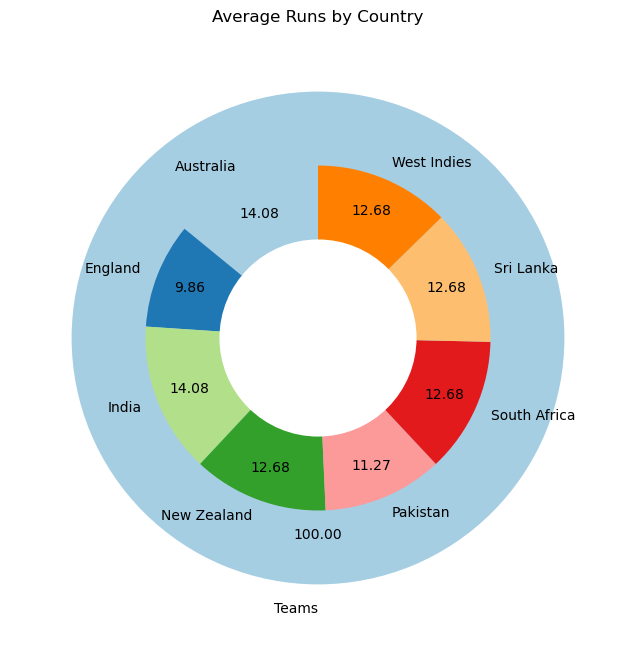

In [16]:
data = df

# Calculate the average runs for each country
country_means = data.groupby('COUNTRY')['Average'].mean()

# Create a donut pie chart
plt.figure(figsize=(8, 8))

# Outside donut
outside_labels = ["Teams"]
outside_values = [data['COUNTRY'].nunique()]  # Use nunique() to count unique countries
outside_colors = plt.cm.Paired(np.arange(len(outside_labels)))

ins = plt.pie(outside_values, labels=outside_labels, autopct="%0.2f", pctdistance=0.80, startangle=90, colors=outside_colors)

# Inside donut
inside_labels = [country for country in country_means.index]
inside_values = [round(mean, 2) for mean in country_means]
inside_colors = plt.cm.Paired(np.arange(len(inside_labels)))

out = plt.pie(inside_values, labels=inside_labels, autopct="%0.2f", radius=0.7, pctdistance=0.80, startangle=90, colors=inside_colors)

hole = plt.Circle((0, 0), 0.4, color='white', linewidth=0)
fig = plt.gcf()
fig.gca().add_artist(hole)

plt.title("Average Runs by Country")

plt.show()

In [17]:
country_innings = data.groupby('COUNTRY')['Innings'].sum()

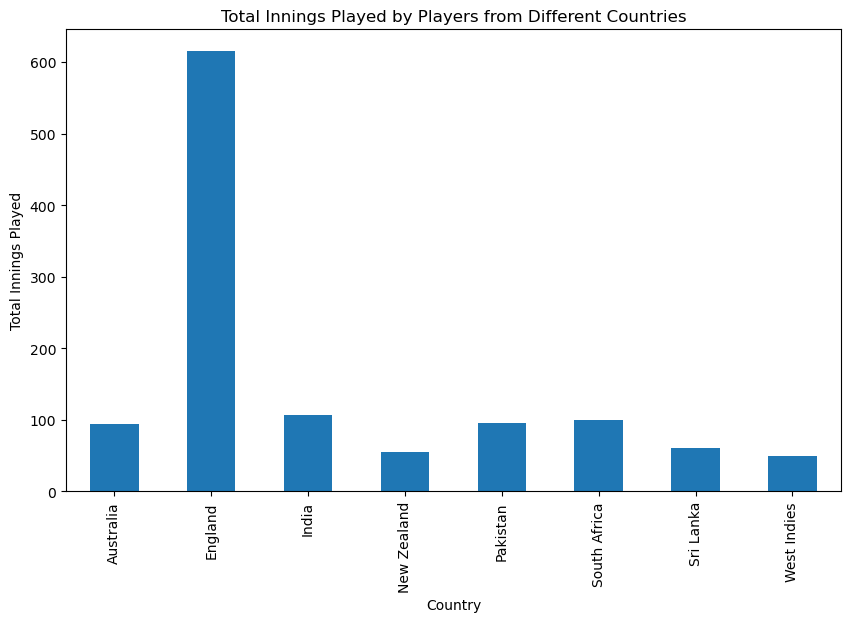

In [18]:
plt.figure(figsize=(10, 6))  # Set the figure size
country_innings.plot(kind='bar')
plt.title("Total Innings Played by Players from Different Countries")
plt.xlabel("Country")
plt.ylabel("Total Innings Played")
plt.show()

# Machine Learning Model

In [19]:
df = pd.read_csv("./Cleaned-Cricket-Dataset.csv")

# Split the data into features (X) and target variable (y)
X = df[['Matches', 'Innings', 'In-At Number', 'Average']]
y = df['Runs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Ridge regression model
alpha = 1.0  # You can adjust the alpha parameter for the strength of regularization
ridge_model = Ridge(alpha=alpha)

# Fit the model on the training data
ridge_model.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = ridge_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# use this trained model (ridge_model) to make predictions on new data.


Mean Squared Error: 0.0002953662294521875


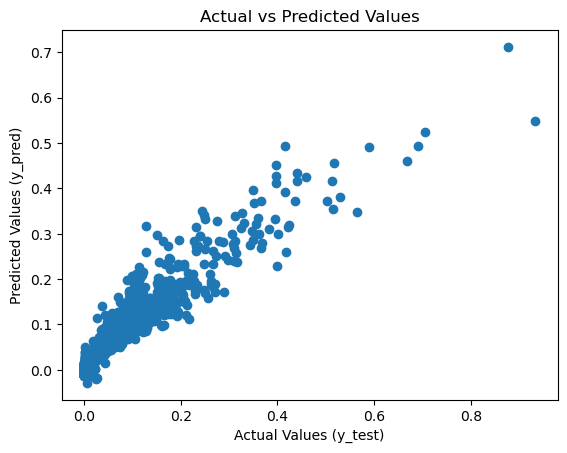

In [20]:
# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.show()


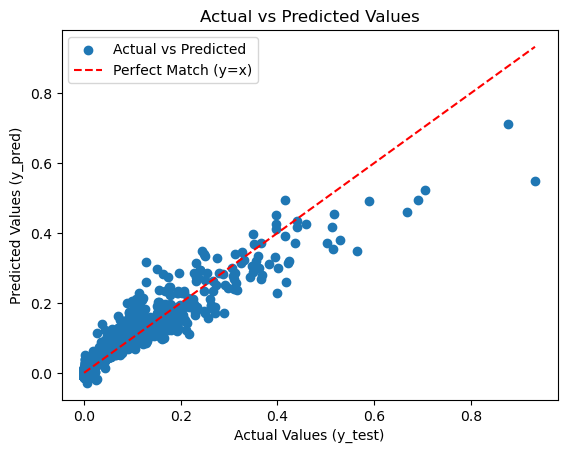

In [21]:
# Scatter plot with the line y=x for reference
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Match (y=x)')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values (y_pred)')
plt.legend()
plt.show()
